In [27]:
from sklearn.datasets import (make_blobs, make_circles, make_moons)
import matplotlib.pyplot as plt
from pandas import DataFrame
import random
import numpy as np
from matplotlib.animation import FuncAnimation
from scipy import stats

Generate and plot dataset (2 features, label defined by colour) 

class 0 count: 500
class 1 count: 500


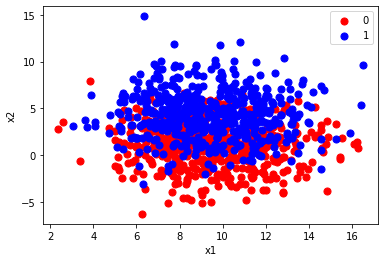

In [28]:
# to replicate data, seed is predefined
np.random.seed(4)
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std = 2.5)
#X, y = make_moons(n_samples=100,noise=0.1)
#X, y = make_circles(factor=0.25, noise=0.25, n_samples=1000)
df = DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
grouped = df.groupby('label')
ax = plt.subplot()
for key, group in grouped:
    group.plot(ax = ax, kind='scatter', x='x1', y='x2',  color=colors[key], s = 50, label = key);
plt.legend()
df.head()
allCount = df.shape[0]
class0Count = np.sum(df['label'] == 0)
class1Count = np.sum(df['label'] == 1)
print("class 0 count: " + str(class0Count))
print("class 1 count: " + str(class1Count))

**Gini impurity for splitting**

for each feature: 

1) calculate the value to split by (usually mean is applied) and the percentage the split represents (later used for weighting)

2) calculate probability of each class in each branch (after splitting), square the probability and extract the sum of squared probabilities from 1. 

3) calculate weighted Gini index


If data is classified perfectly after the split, the value of Gini index is 0. If data is distibuted evenly, the value of Gini index is 1-1/(number of classes). 
The split should be made based on the feature which has the lowest Gini index. 





Splitting by the mean value of x1:

x1MoreThanMeanClass0Count: 244
x1MoreThanMeanClass1Count: 244
giniImpurityMore: 0.5
x1LessThanMeanClass0Count: 256
x1LessThanMeanClass1Count: 256
giniImpurityLess: 0.5
 Gini impurity value by x1:
0.5


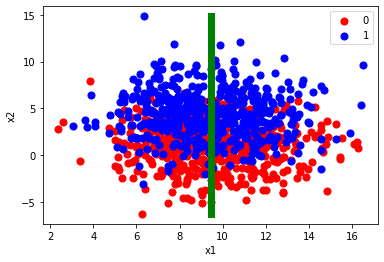

In [30]:
# analyze variable x1 (calculate mean value)
meanX1  = df['x1'].mean()
# visualize splitting result 
ax = plt.subplot()
for key, group in grouped:
    group.plot(ax = ax, kind='scatter', x='x1', y='x2',  color=colors[key], s = 50, label = key);
plt.plot([meanX1, meanX1], [df['x2'].min(), df['x2'].max()], 'g-', linewidth=7.0)
plt.legend()

x1MoreCount = np.sum(df['x1'] > meanX1)
x1LessCount = allCount - x1MoreCount

# calculate Gini impurity after splitting if x1 > meanX1
x1MoreThanMeanClass0 = DataFrame([df['x1']  > meanX1 , df['label'] == 0]).all(axis = 0)
x1MoreThanMeanClass0Count = np.sum(x1MoreThanMeanClass0)
print("x1MoreThanMeanClass0Count: " + str(x1MoreThanMeanClass0Count))

x1MoreThanMeanClass1 = DataFrame([df['x1']  > meanX1 , df['label'] == 1]).all(axis = 0)
x1MoreThanMeanClass1Count = np.sum(x1MoreThanMeanClass1)
print("x1MoreThanMeanClass1Count: " + str(x1MoreThanMeanClass1Count))

giniImpurityMore = 1-( (x1MoreThanMeanClass0Count/x1MoreCount)**2 + (x1MoreThanMeanClass1Count/x1MoreCount)**2  )
print("giniImpurityMore: " + str(giniImpurityMore))

# calculate Gini impurity after splitting if x1 <= meanX1
x1LessThanMeanClass0 = DataFrame([df['x1']  <= meanX1 , df['label'] == 0]).all(axis = 0)
x1LessThanMeanClass0Count = np.sum(x1LessThanMeanClass0)
print("x1LessThanMeanClass0Count: " + str(x1LessThanMeanClass0Count))

x1LessThanMeanClass1 = DataFrame([df['x1']  <= meanX1 , df['label'] == 1]).all(axis = 0)
x1LessThanMeanClass1Count = np.sum(x1LessThanMeanClass1)
print("x1LessThanMeanClass1Count: " + str(x1LessThanMeanClass1Count))

giniImpurityLess = 1-( (x1LessThanMeanClass0Count/x1LessCount)**2 + (x1LessThanMeanClass1Count/x1LessCount)**2  )
print("giniImpurityLess: " + str(giniImpurityLess))

# calculate weighted Gini impurity value
print(" Gini impurity value by x1:")
splittingEval = x1MoreCount/allCount * giniImpurityMore + x1LessCount/allCount*giniImpurityLess
print(splittingEval)





Splitting by the mean value of x2:

x1MoreThanMeanClass0Count: 118
x1MoreThanMeanClass1Count: 375
giniImpurityMore: 0.36412410666161965
x2LessThanMeanClass0Count: 382
x2LessThanMeanClass1Count: 0
giniImpurityLess: 0.4323105711362426
 Gini impurity value by x2:
0.39869464415025346


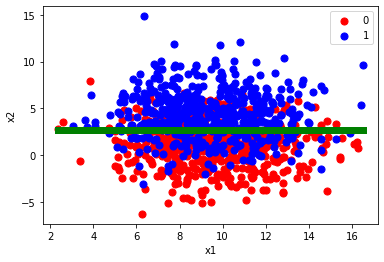

In [32]:
# analyze variable x2 (calculate mean value)
meanX2  = df['x2'].mean()
# visualize splitting result 
ax = plt.subplot()
for key, group in grouped:
    group.plot(ax = ax, kind='scatter', x='x1', y='x2',  color=colors[key], s = 50, label = key);
plt.plot([df['x1'].min(), df['x1'].max()], [meanX2, meanX2], 'g-', linewidth=7.0)
plt.legend()

x2MoreCount = np.sum(df['x2'] > meanX2)
x2LessCount = allCount - x2MoreCount

# calculate Gini impurity after splitting if x1 > meanX1
x2MoreThanMeanClass0 = DataFrame([df['x2']  > meanX2 , df['label'] == 0]).all(axis = 0)
x2MoreThanMeanClass0Count = np.sum(x2MoreThanMeanClass0)
print("x1MoreThanMeanClass0Count: " + str(x2MoreThanMeanClass0Count))

x2MoreThanMeanClass1 = DataFrame([df['x2']  > meanX2 , df['label'] == 1]).all(axis = 0)
x2MoreThanMeanClass1Count = np.sum(x2MoreThanMeanClass1)
print("x1MoreThanMeanClass1Count: " + str(x2MoreThanMeanClass1Count))

giniImpurityMore = 1-( (x2MoreThanMeanClass0Count/x2MoreCount)**2 + (x2MoreThanMeanClass1Count/x2MoreCount)**2  )
print("giniImpurityMore: " + str(giniImpurityMore))

# calculate Gini impurity after splitting if x1 <= meanX1
x2LessThanMeanClass0 = DataFrame([df['x2']  <= meanX2 , df['label'] == 0]).all(axis = 0)
x2LessThanMeanClass0Count = np.sum(x2LessThanMeanClass0)
print("x2LessThanMeanClass0Count: " + str(x2LessThanMeanClass0Count))

x2LessThanMeanClass1 = DataFrame([df['x1']  <= meanX2 , df['label'] == 1]).all(axis = 0)
x2LessThanMeanClass1Count = np.sum(x2LessThanMeanClass1)
print("x2LessThanMeanClass1Count: " + str(x2LessThanMeanClass1Count))

giniImpurityLess = 1-( (x2LessThanMeanClass0Count/x2LessCount)**2 + (x2LessThanMeanClass1Count/x2LessCount)**2  )
print("giniImpurityLess: " + str(giniImpurityLess))

# calculate weighted Gini impurity value
print(" Gini impurity value by x2:")
splittingEval = x2MoreCount/allCount * giniImpurityMore + x2LessCount/allCount*giniImpurityLess
print(splittingEval)



If the splitting in the decision tree is based on the Gini impurity criteria, the best feature to split the dataset by is 'x2' as its weighted Gini impurity index is lower than splitted by 'x1'. 

This can also be seen in the figures, as the splitting line by 'x1' splits each class (0, 1) to approximately equal sizes. On the other hand, splitting by 'x2' results in more class 1 values above the line and class 0 values below the line. 
